In [1]:
#Auto-reload modules (used to develop functions outside this notebook)
%load_ext autoreload
%autoreload 2

In [2]:
import pyabf as abf #https://pypi.org/project/pyabf/
import matplotlib.pyplot as plt
from enum import Enum
import pims_nd2
import pandas as pd
import datetime
import pytz #for timezones
import numpy as np
import os

In [3]:
# Add 2p-py path
import sys
sys.path.append('../2p-py/')

In [4]:
# import modules from 2p-py
import labrotation.file_handling as file_handling
import labrotation.two_photon_session as two_photon_session
import labrotation.belt_processing as belt_processing

In [5]:
matlab_2p_path = file_handling.open_dir("Choose matlab-2p folder!")

In [6]:
nd2_path = file_handling.open_file("Choose Nikon imaging file (.nd2)!")
nd2_meta_path = file_handling.open_file("Choose Nikon metadata file (.txt)!")
labview_path = file_handling.open_file("Choose LabView file (xy.txt, NOT xytime.txt)!")
labview_timestamps_path = labview_path[:-4] + "time.txt"
lfp_path = file_handling.open_file("Choose LFP file (.abf)!")

In [7]:
session = two_photon_session.TwoPhotonSession.init_and_process(nd2_path, nd2_meta_path, labview_path, labview_timestamps_path, lfp_path, matlab_2p_path)

D:\Software\anaconda\envs\2ppy\lib\site-packages\pims\base_frames.py:472: UserWarning: Please call FramesSequenceND.__init__() at the start of thethe reader initialization.
  warn("Please call FramesSequenceND.__init__() at the start of the"


Calling Matlab-2p beltProcessPipelineExpProps with arguments:
	D:\PhD\ChR2 Project\example with lfp
	T370_ChR2_d29_elec.050821.1729
	T370_ChR2_d29_elec_002_nik
Difference of starting times (s): 7.8440010000000004


In [8]:
def plotWindowCompareMax(t_min, t_max):
    """
    v2. Use this function to zoom in at bursts of movements, compare the max values 
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(18, 18))

    # LFP first
    lfp_mov_t, lfp_mov_v = session.lfp_movement()
    # limit data to window
    lfp_mov_t_win = lfp_mov_t[(lfp_mov_t >= t_min) & (lfp_mov_t <= t_max)]
    lfp_mov_v_win = lfp_mov_v[lfp_mov_t_win.index]

    # find maximum of lfp data in window
    t_lfp_max = lfp_mov_t_win[lfp_mov_v_win.idxmax()]


    # LabView second
    lv_mov_t, lv_mov_v = session.labview_movement()

    lv_mov_t_win = lv_mov_t[(lv_mov_t >= t_min) & (lv_mov_t <= t_max)]
    lv_mov_v_win = lv_mov_v[lv_mov_t_win.index]

    t_lv_max = lv_mov_t_win[lv_mov_v_win.idxmax()]
    ax1.plot(lfp_mov_t_win, lfp_mov_v_win)
    ax1.axvline(t_lfp_max, color="r")
    ax2.plot(lv_mov_t_win, lv_mov_v_win)
    ax2.axvline(t_lv_max, color="r")
    ax2.set_xlim([t_min, t_max])

    print(f"LFP max: { t_lfp_max }\nLV  max: {t_lv_max }\nAdd {t_lv_max - t_lfp_max} to LFP")
    plt.show()

LFP max: 143.51127739620003
LV  max: 143.535044
Add 0.0237666037999702 to LFP


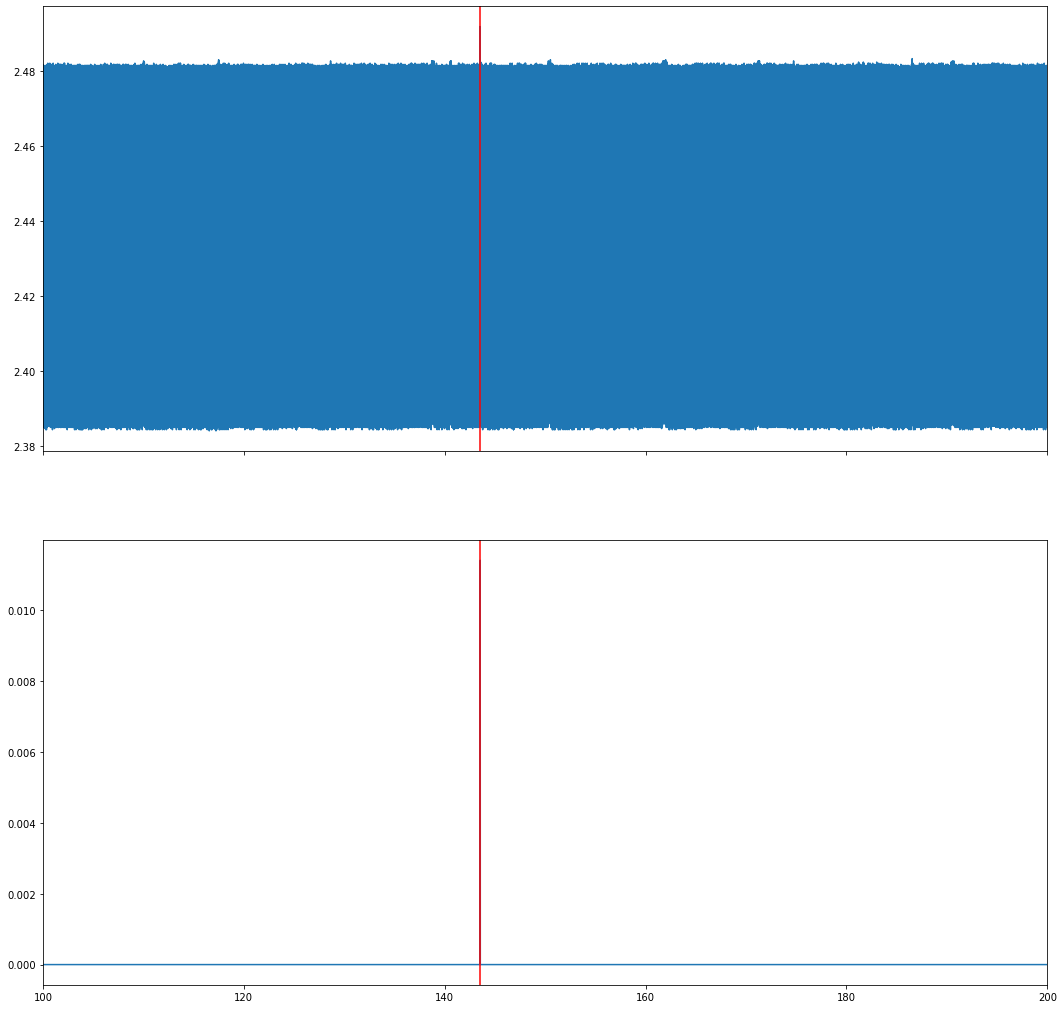

In [9]:
# match more precisely by finding same peaks of velocity in both channels (LabView, LFP/Axoscope)
plotWindowCompareMax(100, 200)

In [11]:
session.shift_lfp(0.  , match_type="zero")  # use shift_lfp() to correct matching issues

In [ ]:
# todo create criterium for movement (distance? seconds runing?)
# then create way to split up into parts: before sz, during sz, after sz. include sd?
# run through files of multiple experiments.

In [14]:
session.belt_scn_df.keys()

Index(['tsscn', 'rounds', 'speed', 'distance', 'totdist', 'running'], dtype='object')

<AxesSubplot:>

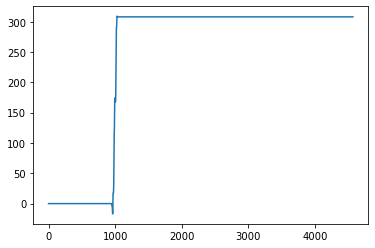

In [15]:
session.belt_scn_df["totdist"].plot()